# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\tetra\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\requirements.py", line 36, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\tetra\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\tetra\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\tetra\AppData\


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [3]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.6.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cv                        1.0.0
cycler                    0.12.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsonschema            2.20.0
flatbuffers               24.3.25
fonttools                 4.54.0
fqdn                      1.5.1
gast          

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

C:\Users\tetra\AppData\Local\Temp\ipykernel_22296\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize' 

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\tetra\AppData\Local\Temp\ipykernel_22296\3517054557.py:1: SyntaxWarning: invalid escape sequence '\D'
  data_dir = 'Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize'


In [9]:
import os

y_path = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize"
print(os.listdir(y_path))


['chillis', 'mais']


In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
import os
import cv2
import imghdr

# Define your data directory and acceptable image formats
data_dir = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize"
image_exts = ['jpeg', 'jpg', 'png', 'gif', 'bmp']  # Add any other formats you want to include

# Loop through each class subdirectory
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    if os.path.isdir(class_dir):  # Ensure it's a directory
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                img = cv2.imread(image_path)  # Try to read the image
                tip = imghdr.what(image_path)  # Get the image type
                
                if tip not in image_exts:
                    print(f'Image not in ext list: {image_path}')
                    os.remove(image_path)  # Remove the image if not valid
            except Exception as e:
                print(f'Issue with image {image_path}: {e}')  # Print the exception message
                # Optionally, you can uncomment the next line to remove the problematic image
                # os.remove(image_path)


Issue with image C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize\chillis\.ipynb_checkpoints: [Errno 13] Permission denied: 'C:\\Users\\tetra\\Downloads\\ImageClassification-main\\ImageClassification-main\\data\\maize\\chillis\\.ipynb_checkpoints'
Issue with image C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize\chillis\test: [Errno 13] Permission denied: 'C:\\Users\\tetra\\Downloads\\ImageClassification-main\\ImageClassification-main\\data\\maize\\chillis\\test'
Issue with image C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize\chillis\train: [Errno 13] Permission denied: 'C:\\Users\\tetra\\Downloads\\ImageClassification-main\\ImageClassification-main\\data\\maize\\chillis\\train'
Issue with image C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize\chillis\valid: [Errno 13] Permission denied: 'C:\\Users\\tetra\\Downloads\\ImageClassification-m

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize")


Found 4100 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

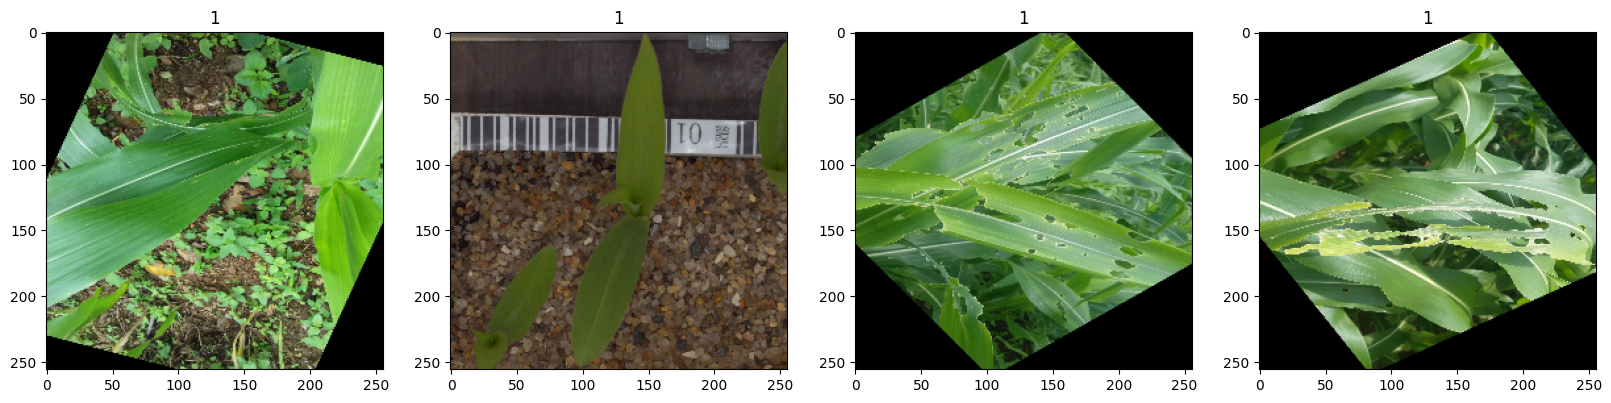

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

90

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\tetra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 417ms/step - accuracy: 1.0000 - loss: 7.4572e-05 - val_accuracy: 0.9912 - val_loss: 0.0553
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 422ms/step - accuracy: 1.0000 - loss: 6.8542e-05 - val_accuracy: 0.9900 - val_loss: 0.0779
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 420ms/step - accuracy: 1.0000 - loss: 5.9621e-05 - val_accuracy: 0.9900 - val_loss: 0.0796
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 426ms/step - accuracy: 1.0000 - loss: 4.7903e-05 - val_accuracy: 0.9912 - val_loss: 0.0665
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 452ms/step - accuracy: 1.0000 - loss: 4.4899e-05 - val_accuracy: 0.9912 - val_loss: 0.0577
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 425ms/step - accuracy: 1.0000 - loss: 3.9756e-05 - val_accuracy: 0.9925 - val_loss: 0.0717
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 427ms/step - accuracy: 1.0000 - loss: 3.8303e-05 - val_accuracy: 0.9912 - val_loss: 0.0654
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 437ms/step - accuracy: 1.00

# 8. Plot Performance

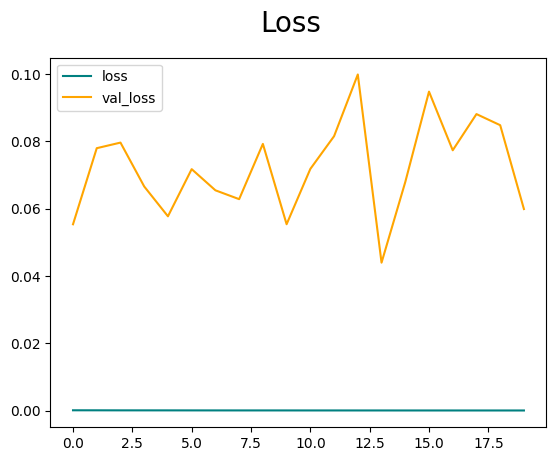

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

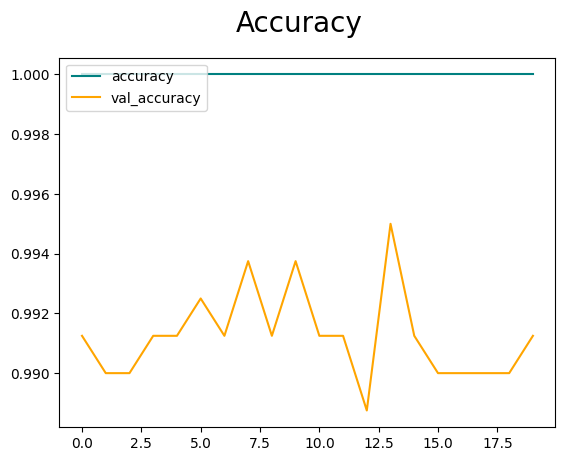

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9858156, shape=(), dtype=float32) tf.Tensor(0.9964158, shape=(), dtype=float32) tf.Tensor(0.9869792, shape=(), dtype=float32)


# 10. Test

In [38]:
import cv2

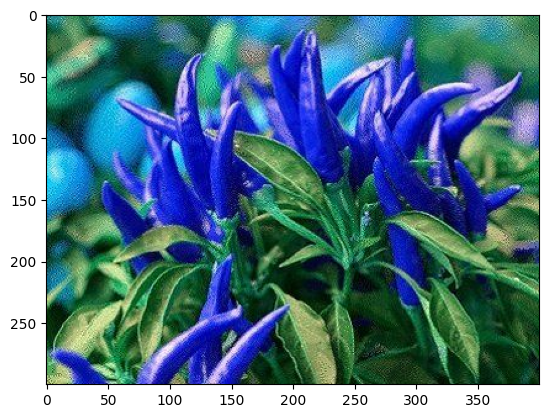

In [39]:
import cv2
import matplotlib.pyplot as plt

# Load the image
# Ensure the correct path to the image is provided
img = cv2.imread(r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data\maize\chillis\chillione.jpg")

if img is not None:
    plt.imshow(img)
    plt.show()
else:
    print("Error: Image not found or cannot be opened.")

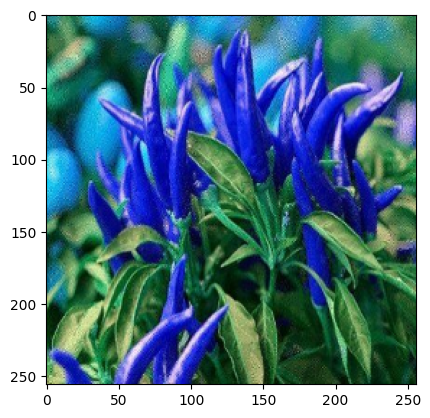

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

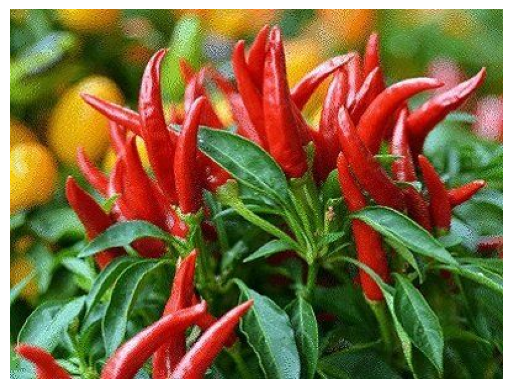

In [41]:
import cv2
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Optional: Turn off axis
plt.show()


In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [43]:
yhat

array([[1.549452e-10]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is maize')
else:
    print(f'Predicted class is chilli')

Predicted class is chilli


# 11. Save the Model

In [45]:
from tensorflow.keras.models import load_model

In [46]:
!pip install h5py


In [47]:
import os

if not os.path.exists('models'):
    os.makedirs('models')


In [48]:
model.export(os.path.join('models', 'imageclassifier_tf'))


INFO:tensorflow:Assets written to: models\imageclassifier_tf\assets


INFO:tensorflow:Assets written to: models\imageclassifier_tf\assets


Saved artifact at 'models\imageclassifier_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2864760369616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864760370384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864760370576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864760371344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864760372112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864760373072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864760372304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864760372880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864750510544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2864750512080: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [49]:
!pip install opencv-python numpy keras


In [50]:
import os
print(os.listdir())  # This will list all files in the current directory


['.ipynb_checkpoints', '1696770175524aFyYs4mSmrUJ3qPE.pdf', '1696770696082JeX6aqF40rV5HGp4.xls', '16977507510511ROgOVq3P8d8wwud.pdf', '1697753937747I3LZBnKHWJf72hXJ.pdf', '1701170036024RGHfLAptOnJScpTL.pdf', '1701607785310WNz9hc8WzBZ1E2xi.pdf', '1win_Hemanth Reddy.txt', '202310051846384638 (1).jpg', '202310051846384638.jpg', '22WU0101146 1_removed (1).pdf', '22WU0101146 1_removed.pdf', '22WU0101151.pdf', '2captcha-chrome', '2captcha-chrome (1)', '2captcha-chrome (1).zip', '2captcha-chrome.zip', '2nd.pptx', '7z2201-x64.msi', '8ciAZ8yu0DOnJoyfyhxHnRtSPfUd1GIvEZCGOSpG (1).pdf', '8ciAZ8yu0DOnJoyfyhxHnRtSPfUd1GIvEZCGOSpG (2).pdf', '8ciAZ8yu0DOnJoyfyhxHnRtSPfUd1GIvEZCGOSpG.pdf', 'ADMIT CARD.pdf', 'AI Coursera.pdf', 'akatetrax-local currency-withdrawals (1).csv', 'akatetrax-local currency-withdrawals.csv', 'algo test.doc', 'Anaconda3-2023.07-2-Windows-x86_64.exe', 'Anaconda3-2023.09-0-Windows-x86_64.exe', 'Applicative Project Second Presentation.pptx', 'Applicative Project Second Presentation

In [51]:
import os

# Specify the directory you want to create
base_directory = r"C:\Users\tetra\Downloads\ImageClassification-main"
new_directory = os.path.join(base_directory, "ImageClassification-main")

# Create the directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)
    print(f"Directory created: {new_directory}")
else:
    print(f"Directory already exists: {new_directory}")


Directory already exists: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main


In [52]:
# Create subdirectories
subdirectories = ["data", "models", "logs"]

for subdir in subdirectories:
    path = os.path.join(new_directory, subdir)
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Subdirectory created: {path}")
    else:
        print(f"Subdirectory already exists: {path}")


Subdirectory already exists: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data
Subdirectory already exists: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\models
Subdirectory already exists: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\logs


In [53]:
import os

# Main directory path
base_directory = r"C:\Users\tetra\Downloads\ImageClassification-main"
main_directory = os.path.join(base_directory, "ImageClassification-main")

# Create main directory
if not os.path.exists(main_directory):
    os.makedirs(main_directory)
    print(f"Directory created: {main_directory}")
else:
    print(f"Directory already exists: {main_directory}")

# Create subdirectories
subdirectories = ["data", "models", "logs"]

for subdir in subdirectories:
    path = os.path.join(main_directory, subdir)
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Subdirectory created: {path}")
    else:
        print(f"Subdirectory already exists: {path}")


Directory already exists: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main
Subdirectory already exists: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\data
Subdirectory already exists: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\models
Subdirectory already exists: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\logs


In [54]:
conda create -n new_env python=3.8 h5py opencv numpy keras
conda activate new_env
jupyter notebook


SyntaxError: invalid syntax (1585005007.py, line 1)

In [59]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,089,877 (42.30 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,393,252 (28.20 MB)

In [66]:
image = cv2.resize(im, (224, 224))  # Only width and height


In [67]:
from keras.layers import Flatten
model.add(Flatten())


In [68]:
feature = np.array(image).reshape((1, 224, 224, 3))  # Adjust size as needed


In [69]:
!pip install h5py


In [57]:
import sys
print(sys.executable)


C:\Users\tetra\AppData\Local\Programs\Python\Python312\python.exe


In [4]:
import os

model_dir = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\models"
weights_file_path = os.path.join(model_dir, "image_classifier_weights.h5")


In [10]:
import os

# Define the new directory for your model weights
new_model_dir = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models"
os.makedirs(new_model_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Define the path to the weights file
weights_file_path = os.path.join(new_model_dir, "image_classifier_weights.h5")

# Inform the user about the new path
print(f"New directory created and weights file path set to: {weights_file_path}")


New directory created and weights file path set to: C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models\image_classifier_weights.h5


In [2]:
import os
new_model_dir =r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models"
weights_file_path = os.path.join(new_model_dir, "image_classifier_weights.h5")


In [3]:
weights_file_path = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models"


In [6]:
import os
from keras.models import load_model, model_from_json

# Define the model directory
model_dir = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\models"

# Define the new directory for weights
new_model_dir = "Downloads/ImageClassification-main/ImageClassification-main/models/imageclassifier.h5"
weights_file_path = os.path.join(new_model_dir, "image_classifier_weights.h5")

# Define the JSON path
json_file_path = os.path.join(model_dir, "image_classifier_model.json")

# Load the model architecture from JSON
try:
    with open(json_file_path, "r") as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json)
    print("Model architecture loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file paths.")

# Load the weights if the file exists
if os.path.exists(weights_file_path):
    model.load_weights(weights_file_path)
    print("Model weights loaded successfully.")
else:
    print(f"Error: Weights file not found at {weights_file_path}. Please check the file paths.")

# Define a new path to save the complete model in the recommended .keras format
combined_model_path = os.path.join(model_dir, "combined_image_classifier_model.keras")

# Save the complete model (architecture + weights) in the .keras format
model.save(combined_model_path)
print(f"Combined model saved at {combined_model_path}")


Model architecture loaded successfully.
Error: Weights file not found at Downloads/ImageClassification-main/ImageClassification-main/models/imageclassifier.h5\image_classifier_weights.h5. Please check the file paths.
Combined model saved at C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\models\combined_image_classifier_model.keras


In [7]:
import h5py
print(h5py)


<module 'h5py' from 'C:\\Users\\tetra\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\h5py\\__init__.py'>


In [9]:
%pip install --upgrade h5py


Note: you may need to restart the kernel to use updated packages.


In [12]:
import h5py
print(h5py.__version__)


3.12.1


In [2]:
import os

# Define the model directory
model_dir = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models"
os.makedirs(model_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save the model architecture to JSON
model_json = model.to_json()  # This assumes `model` is your trained model
with open(os.path.join(model_dir, "image_classifier_model.json"), "w") as json_file:
    json_file.write(model_json)

# Save the weights
model.save_weights(os.path.join(model_dir, "image_classifier_weights.h5"))

print("Model architecture and weights saved successfully.")


NameError: name 'model' is not defined

In [1]:
import os
from keras.models import model_from_json

# Define the model directory
model_dir = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models"
os.makedirs(model_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save the model architecture to JSON
model_json = model.to_json()  # Assuming 'model' is your trained model
with open(os.path.join(model_dir, "image_classifier_model.json"), "w") as json_file:
    json_file.write(model_json)

# Save the weights
model.save_weights(os.path.join(model_dir, "image_classifier_weights.h5"))

print("Model architecture and weights saved successfully.")


NameError: name 'model' is not defined

In [1]:
import os
import cv2
from keras.models import model_from_json
import numpy as np

# Paths to your model files
model_dir = r"C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models"
json_file_path = os.path.join(model_dir, "image_classifier_model.json")
weights_file_path = os.path.join(model_dir, "image_classifier_weights.h5")

# Check if weights file exists
if not os.path.isfile(weights_file_path):
    print(f"Error: Weights file not found at {weights_file_path}")
    exit()  # Exit if the weights file is missing

# Check if model JSON file exists
if not os.path.isfile(json_file_path):
    print(f"Error: Model JSON file not found at {json_file_path}")
    exit()  # Exit if the model JSON file is missing

# Load your model
try:
    with open(json_file_path, "r") as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json)
    model.load_weights(weights_file_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error while loading model: {e}")
    exit()  # Exit if the model cannot be loaded

# Load Haar Cascade for face detection (if needed)
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 224, 224, 3)  # Update to match your model's input shape
    return feature / 255.0  # Normalize the image

# Open webcam
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Error: Could not open webcam. Check if it's connected.")
    exit()  # Exit if webcam cannot be opened

labels = {0: 'chilli', 1: 'maize'}  # Update labels for crops

while True:
    ret, im = webcam.read()  # `ret` indicates if the read was successful
    if not ret:
        print("Error: Could not read frame from webcam. Ensure the webcam is working.")
        break
    
    # Resize and classify the entire frame
    image = cv2.resize(im, (224, 224))  # Resize for your model's input
    img = extract_features(image)
    pred = model.predict(img)
    prediction_label = labels[pred.argmax()]

    # Display the predicted label on the image
    cv2.putText(im, '%s' % (prediction_label), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 2)

    cv2.imshow("Output", im)
    if cv2.waitKey(27) & 0xFF == ord('q'):  # Press 'q' to exit
        break

webcam.release()
cv2.destroyAllWindows()


Error: Weights file not found at C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models\image_classifier_weights.h5
Error: Model JSON file not found at C:\Users\tetra\Downloads\ImageClassification-main\ImageClassification-main\new_models\image_classifier_model.json
Error while loading model: [Errno 2] No such file or directory: 'C:\\Users\\tetra\\Downloads\\ImageClassification-main\\ImageClassification-main\\new_models\\image_classifier_model.json'


NameError: name 'model' is not defined

NameError: name 'model' is not defined

In [2]:
webcam = cv2.VideoCapture(1)  # Try changing to 1 or 2 if 0 doesn't work


NameError: name 'cv2' is not defined